In [1]:
import sys, os, json, re

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

dirPath = os.path.dirname(os.path.realpath("__file__"))
packagesPath = os.path.join(dirPath, 'packages')
print(packagesPath)

if not packagesPath in sys.path:
    sys.path.append(packagesPath)
    
# IPython extension to reload modules before executing user code.
# autoreload reloads modules automatically before entering the execution of code typed at the IPython prompt.
%reload_ext autoreload
%autoreload 2

/notebooks/Papers/paper2/packages


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
import packages.dataset as dataset

excludedFiles = [
"43_content.txt",
"38_content.txt",
"48_content.txt",
"34_content.txt",
"26_content.txt",
"41_content.txt",
"29_content.txt",
"39_content.txt",
"23_content.txt",
"28_content.txt",
"30_content.txt",
"46_content.txt",
"40_content.txt",
"33_content.txt",
"17_content.txt",
"18_content.txt",
"50_content.txt",
"49_content.txt",
"47_content.txt"
]
datasetPath = os.path.join(dirPath, 'datasets')
dataProcessor = dataset.Brexit(datasetPath)
dataProcessor.setExcludedFilenames(excludedFiles)
dataProcessor.loadFilePaths()

Dataset path:
/notebooks/Papers/paper2/datasets/brexit
Total files 29
-------------------------------
Training file count:  23
Total files in list:  23
-------------------------------
Total validation file count 2
Total files in list:  2
-------------------------------
Total test file count 4
Total files in list:  4
-------------------------------


In [3]:
from packages.gc.word2vec import Word2Vec
word2vecProcessor = Word2Vec(dataProcessor)

In [4]:
# 
# print('The skip-gram pairs : target,context')
# for i in range(100):
#     print('(', x_batch[i], word2vecProcessor.id2Word[x_batch[i]],
#           ',', y_batch[i], word2vecProcessor.id2Word[y_batch[i]], ')')
# 

In [5]:
train = True
if train:
    skipWindow = 2
    word2vecProcessor.resetIndex()
    word2vecProcessor.setNumberOfIterations(500)
    word2vecProcessor.setSkipWindow(skipWindow)
    word2vecProcessor.setBatchSize(128)
    word2vecProcessor.train()

Instructions for updating:
Colocations handled automatically by placer.
Batches:  14
Instructions for updating:
Use tf.cast instead.
--------------------------

Average loss after epoch  0 :  11.08426993233817

Average loss after epoch  0 :  12.552364582918129

Average loss after epoch  0 :  12.535605038567812

Average loss after epoch  0 :  12.080543966901049

Average loss after epoch  0 :  12.660116500216704

Average loss after epoch  0 :  12.83981039315164

Average loss after epoch  0 :  10.177922727231257

Average loss after epoch  0 :  13.25600361835134

Average loss after epoch  0 :  12.008783016893958

Average loss after epoch  0 :  10.37867693633506

Average loss after epoch  0 :  10.54489677614447

Average loss after epoch  0 :  10.348838103290452

Average loss after epoch  0 :  8.383635879448201

Average loss after epoch  0 :  9.434586618691055
Similar to World: Renishaw, date, character, set, cameras,
Similar to medicines: As, Trump, centreleft, burdens, Anyone,
Similar to T


Average loss after epoch  7 :  4.391422168854026

Average loss after epoch  7 :  3.3800288535614205

Average loss after epoch  7 :  4.589554727769036

Average loss after epoch  7 :  3.4198178521718394

Average loss after epoch  7 :  3.599002764848909

Average loss after epoch  7 :  2.8023177503282146

Average loss after epoch  7 :  4.4428505991096605

Average loss after epoch  7 :  3.8704067305028107

Average loss after epoch  7 :  2.9973231457195086

Average loss after epoch  7 :  4.785352237895283

Average loss after epoch  7 :  4.197544473116962

Average loss after epoch  7 :  3.9557683395278858
Similar to World: Renishaw, authorities, date, Elizabeth, game,
Similar to medicines: Trump, centreleft, As, Anyone, burdens,
Similar to Theresa: EU, National, Car, ICO, Man,
Similar to providers: Current, Wales, manufacturing, Farright, Northern,
Similar to Image: instruments, bottles, Tunnel, attention, Whitfield,
Similar to port: Deputy, government, EU, scale, days,
Similar to referendum


Average loss after epoch  14 :  1.9983903309481637
Similar to World: authorities, Renishaw, Elizabeth, St, game,
Similar to medicines: centreleft, Trump, As, Amber, Anyone,
Similar to Theresa: EU, National, Car, ICO, Man,
Similar to providers: manufacturing, Current, Northern, destination, Wales,
Similar to Image: instruments, attention, Tunnel, argument, bottles,
Similar to port: Deputy, government, scale, days, jobs,
Similar to referendum: industry, system, investment, Periodico, Cardiff,
Similar to prices: vets, intention, pieces, news, point,
--------------------------

Average loss after epoch  15 :  1.8266857692173548

Average loss after epoch  15 :  1.2468989819896465

Average loss after epoch  15 :  1.1929463895347305

Average loss after epoch  15 :  2.110493997393524

Average loss after epoch  15 :  1.7565905267041693

Average loss after epoch  15 :  1.6947922480535065

Average loss after epoch  15 :  1.139012641654352

Average loss after epoch  15 :  1.179906458155452

Avera


Average loss after epoch  21 :  1.0466234026308303

Average loss after epoch  21 :  1.388529926098212

Average loss after epoch  21 :  0.8359777692923108

Average loss after epoch  21 :  0.517702458614176

Average loss after epoch  21 :  0.9864455886053234

Average loss after epoch  21 :  1.6669711500929025

Average loss after epoch  21 :  0.6440886729567266
Similar to World: authorities, Elizabeth, St, Renishaw, game,
Similar to medicines: centreleft, Trump, Amber, As, Anyone,
Similar to Theresa: EU, National, ICO, Car, Man,
Similar to providers: manufacturing, Northern, Current, destination, scale,
Similar to Image: instruments, attention, Tunnel, argument, University,
Similar to port: Deputy, government, scale, days, wine,
Similar to referendum: industry, system, investment, Cardiff, Periodico,
Similar to prices: intention, point, news, vets, pieces,
--------------------------

Average loss after epoch  22 :  0.5188424587249756

Average loss after epoch  22 :  0.6250405822481427

A


Average loss after epoch  28 :  0.9076937258857597

Average loss after epoch  28 :  0.7321732968135825

Average loss after epoch  28 :  0.4646248713138852

Average loss after epoch  28 :  0.7230470173061118

Average loss after epoch  28 :  0.3193177495151774

Average loss after epoch  28 :  0.7345204304637655

Average loss after epoch  28 :  0.3634179997371928

Average loss after epoch  28 :  0.5472172595768265

Average loss after epoch  28 :  0.40528351137829033
Similar to World: authorities, Elizabeth, St, La, max,
Similar to medicines: centreleft, Trump, Amber, point, Anyone,
Similar to Theresa: EU, National, ICO, Man, Car,
Similar to providers: manufacturing, Northern, Current, destination, scale,
Similar to Image: instruments, attention, Tunnel, argument, University,
Similar to port: Deputy, government, scale, days, TV,
Similar to referendum: industry, system, investment, Cardiff, Periodico,
Similar to prices: intention, point, news, vets, meat,
--------------------------

Averag


Average loss after epoch  35 :  0.2736668993765047

Average loss after epoch  35 :  0.4372744929913533

Average loss after epoch  35 :  0.2740001364273958
Similar to World: authorities, Elizabeth, St, La, max,
Similar to medicines: centreleft, Trump, point, Amber, ferries,
Similar to Theresa: EU, National, ICO, Man, Car,
Similar to providers: manufacturing, Northern, destination, Current, scale,
Similar to Image: instruments, attention, Tunnel, argument, University,
Similar to port: Deputy, government, scale, TV, wine,
Similar to referendum: industry, system, investment, Cardiff, Periodico,
Similar to prices: intention, point, news, meat, compromise,
--------------------------

Average loss after epoch  36 :  0.28366478851863314

Average loss after epoch  36 :  0.6220816945543095

Average loss after epoch  36 :  0.4959988209144715

Average loss after epoch  36 :  0.2732673345047551

Average loss after epoch  36 :  0.22593491884951306

Average loss after epoch  36 :  0.2894532294591868


Average loss after epoch  42 :  0.23303019027320707

Average loss after epoch  42 :  0.6789426030292455

Average loss after epoch  42 :  0.2683080890460691

Average loss after epoch  42 :  0.19674692309104175

Average loss after epoch  42 :  0.25654296204887883

Average loss after epoch  42 :  0.1976947643398125

Average loss after epoch  42 :  0.2550185738435734

Average loss after epoch  42 :  0.1773852522772788

Average loss after epoch  42 :  0.17227890956687245

Average loss after epoch  42 :  0.26968343120833754

Average loss after epoch  42 :  0.24514355479395142

Average loss after epoch  42 :  0.26184542847440057

Average loss after epoch  42 :  0.23641370582634877
Similar to World: authorities, Elizabeth, St, character, La,
Similar to medicines: centreleft, Trump, point, Amber, ferries,
Similar to Theresa: EU, National, ICO, Man, Car,
Similar to providers: manufacturing, Northern, destination, Current, scale,
Similar to Image: instruments, attention, Tunnel, University, argu


Average loss after epoch  49 :  0.22591477632522583

Average loss after epoch  49 :  0.21260379467691695

Average loss after epoch  49 :  0.25965852305597187

Average loss after epoch  49 :  0.1987722393766089

Average loss after epoch  49 :  0.15590237206571897

Average loss after epoch  49 :  0.1589132026734477

Average loss after epoch  49 :  0.34527418071246235

Average loss after epoch  49 :  0.18994033127612733

Average loss after epoch  49 :  0.1893423368459563

Average loss after epoch  49 :  0.2454495314326004

Average loss after epoch  49 :  0.1742498185206461

Average loss after epoch  49 :  0.57163965209587

Average loss after epoch  49 :  0.21275619914436877
Similar to World: authorities, Elizabeth, character, St, La,
Similar to medicines: centreleft, Trump, point, Amber, ferries,
Similar to Theresa: EU, National, Man, ICO, accession,
Similar to providers: manufacturing, Northern, destination, Current, scale,
Similar to Image: instruments, attention, Tunnel, University, a


Average loss after epoch  56 :  0.15688488594796426

Average loss after epoch  56 :  0.16958507307378037

Average loss after epoch  56 :  0.13700833236036386
Similar to World: authorities, Elizabeth, character, St, La,
Similar to medicines: centreleft, Trump, point, Amber, ferries,
Similar to Theresa: National, Man, EU, ICO, accession,
Similar to providers: manufacturing, Northern, destination, Current, scale,
Similar to Image: instruments, attention, Tunnel, University, Association,
Similar to port: Deputy, government, scale, TV, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after epoch  57 :  0.2575323922293527

Average loss after epoch  57 :  0.5308613290592116

Average loss after epoch  57 :  0.2152864217063081

Average loss after epoch  57 :  0.18352823086650805

Average loss after epoch  57 :  0.12565272523396898

Average loss after epoch  57


Average loss after epoch  63 :  0.182842327189515

Average loss after epoch  63 :  0.1504041944963641

Average loss after epoch  63 :  0.14576148841368944

Average loss after epoch  63 :  0.1446618096130148

Average loss after epoch  63 :  0.16701047091325874

Average loss after epoch  63 :  0.15772040718271674

Average loss after epoch  63 :  0.14030800265462223

Average loss after epoch  63 :  0.15192701845111664

Average loss after epoch  63 :  0.18210833585598799

Average loss after epoch  63 :  0.14231824400619292

Average loss after epoch  63 :  0.1483046409080395
Similar to World: authorities, Elizabeth, character, La, St,
Similar to medicines: centreleft, Trump, point, ferries, Eldon,
Similar to Theresa: National, Man, EU, ICO, accession,
Similar to providers: manufacturing, Northern, destination, Current, scale,
Similar to Image: instruments, attention, Tunnel, Association, University,
Similar to port: Deputy, government, scale, TV, Paterson,
Similar to referendum: industry, 


Average loss after epoch  69 :  0.12924456979763593
Similar to World: authorities, Elizabeth, character, La, St,
Similar to medicines: centreleft, Trump, point, ferries, Eldon,
Similar to Theresa: Man, National, EU, ICO, accession,
Similar to providers: manufacturing, Northern, destination, Current, scale,
Similar to Image: instruments, attention, Tunnel, Association, University,
Similar to port: Deputy, government, scale, TV, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after epoch  70 :  0.21635314396449498

Average loss after epoch  70 :  0.18147378065148176

Average loss after epoch  70 :  0.1889669929927014

Average loss after epoch  70 :  0.1673122646906931

Average loss after epoch  70 :  0.12584917036194856

Average loss after epoch  70 :  0.13687398908216278

Average loss after epoch  70 :  0.13638941083470876

Average loss after epoch  7


Average loss after epoch  76 :  0.14593234502278957

Average loss after epoch  76 :  0.12928357496361165

Average loss after epoch  76 :  0.11741433170189476

Average loss after epoch  76 :  0.14158682995378263

Average loss after epoch  76 :  0.13094762746304223

Average loss after epoch  76 :  0.15612129071199465
Similar to World: authorities, Elizabeth, character, max, St,
Similar to medicines: centreleft, Trump, point, Eldon, ferries,
Similar to Theresa: Man, National, EU, ICO, accession,
Similar to providers: manufacturing, Northern, destination, Current, scale,
Similar to Image: instruments, attention, Tunnel, Association, University,
Similar to port: Deputy, government, scale, TV, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Similar to prices: intention, point, news, meat, compromise,
--------------------------

Average loss after epoch  77 :  0.20721805095672607

Average loss after epoch  77 :  0.1752581000328064

Average loss after epoch 


Average loss after epoch  83 :  0.10849533079387871

Average loss after epoch  83 :  0.13794146946379268

Average loss after epoch  83 :  0.14136940167866202

Average loss after epoch  83 :  0.14667176769356077

Average loss after epoch  83 :  0.12593984573098885

Average loss after epoch  83 :  0.1146142312238705

Average loss after epoch  83 :  0.12854196222303943

Average loss after epoch  83 :  0.13255882376125785

Average loss after epoch  83 :  0.14132501405881367

Average loss after epoch  83 :  0.14278876052187064
Similar to World: authorities, Elizabeth, character, La, max,
Similar to medicines: centreleft, Trump, point, ferries, Eldon,
Similar to Theresa: Man, National, ICO, EU, accession,
Similar to providers: manufacturing, Northern, destination, Current, scale,
Similar to Image: instruments, attention, Tunnel, Association, University,
Similar to port: Deputy, government, scale, TV, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Similar 


Average loss after epoch  89 :  0.11229009248823416
Similar to World: authorities, character, Elizabeth, La, max,
Similar to medicines: centreleft, Trump, point, ferries, Eldon,
Similar to Theresa: Man, National, ICO, EU, accession,
Similar to providers: manufacturing, Northern, destination, Current, scale,
Similar to Image: instruments, attention, Tunnel, Association, University,
Similar to port: Deputy, government, scale, TV, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after epoch  90 :  0.22456337724413192

Average loss after epoch  90 :  0.1634189924415277

Average loss after epoch  90 :  0.1475595394828229

Average loss after epoch  90 :  0.15523128112198561

Average loss after epoch  90 :  0.14305678747952102

Average loss after epoch  90 :  0.14012957736343154

Average loss after epoch  90 :  0.18053902978307437

Average loss after epoch  


Average loss after epoch  97 :  0.17996835343691767

Average loss after epoch  97 :  0.1703552515965509

Average loss after epoch  97 :  0.1621106984477796

Average loss after epoch  97 :  0.12453737515964365

Average loss after epoch  97 :  0.1209998319963318

Average loss after epoch  97 :  0.13323112180133448

Average loss after epoch  97 :  0.14956027826404275

Average loss after epoch  97 :  0.13847600176273053

Average loss after epoch  97 :  0.12521364770782722

Average loss after epoch  97 :  0.10973940752975482

Average loss after epoch  97 :  0.14686755514076233

Average loss after epoch  97 :  0.14626361087385448

Average loss after epoch  97 :  0.14647286360847356
Similar to World: authorities, character, Elizabeth, La, max,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, National, ICO, EU, accession,
Similar to providers: manufacturing, Northern, destination, scale, Current,
Similar to Image: attention, instruments, Tunnel, Associati

Similar to World: authorities, character, Elizabeth, La, max,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, National, ICO, EU, accession,
Similar to providers: manufacturing, destination, Northern, scale, Current,
Similar to Image: attention, instruments, Tunnel, Association, University,
Similar to port: Deputy, government, scale, TV, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after epoch  104 :  0.20787734644753592

Average loss after epoch  104 :  0.17436968915316522

Average loss after epoch  104 :  0.1443363340359735

Average loss after epoch  104 :  0.15304936618792023

Average loss after epoch  104 :  0.12568714906146625

Average loss after epoch  104 :  0.1249476520003098

Average loss after epoch  104 :  0.14842312568554722

Average loss after epoch  104 :  0.1382793479264701

Average loss after ep


Average loss after epoch  110 :  0.123318720736704

Average loss after epoch  110 :  0.12469673503570625

Average loss after epoch  110 :  0.10061012871856694
Similar to World: authorities, character, Elizabeth, La, max,
Similar to medicines: centreleft, Trump, point, ferries, staff,
Similar to Theresa: Man, National, ICO, EU, accession,
Similar to providers: manufacturing, destination, Northern, scale, Current,
Similar to Image: attention, instruments, Tunnel, Association, University,
Similar to port: Deputy, government, scale, TV, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after epoch  111 :  0.20040978704180037

Average loss after epoch  111 :  0.183926915635868

Average loss after epoch  111 :  0.173537005662223

Average loss after epoch  111 :  0.15402188398151884

Average loss after epoch  111 :  0.11593234716264214

Average loss after epo

Similar to World: authorities, character, Elizabeth, max, La,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, National, ICO, EU, accession,
Similar to providers: manufacturing, destination, Northern, scale, strain,
Similar to Image: attention, instruments, Tunnel, Association, University,
Similar to port: Deputy, government, scale, TV, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after epoch  118 :  0.20953127316066197

Average loss after epoch  118 :  0.14903325450663663

Average loss after epoch  118 :  0.1608441518972636

Average loss after epoch  118 :  0.15398611800465073

Average loss after epoch  118 :  0.09393154877750155

Average loss after epoch  118 :  0.12000646711696336

Average loss after epoch  118 :  0.13484283183395093

Average loss after epoch  118 :  0.1761698012510788

Average loss after ep


Average loss after epoch  124 :  0.1067602021139027

Average loss after epoch  124 :  0.12835737199046188

Average loss after epoch  124 :  0.11693809439061509

Average loss after epoch  124 :  0.1532044737178076

Average loss after epoch  124 :  0.13975773772056604

Average loss after epoch  124 :  0.1006246964991488

Average loss after epoch  124 :  0.1042364762003961

Average loss after epoch  124 :  0.10893483620155242

Average loss after epoch  124 :  0.12554942402191702

Average loss after epoch  124 :  0.11709282145113302
Similar to World: authorities, character, Elizabeth, max, La,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, National, ICO, EU, accession,
Similar to providers: manufacturing, destination, Northern, scale, strain,
Similar to Image: attention, instruments, Tunnel, Association, University,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Simi


Average loss after epoch  131 :  0.14170950667842014

Average loss after epoch  131 :  0.13125443034000608

Average loss after epoch  131 :  0.12290510079167245

Average loss after epoch  131 :  0.11710174349156302
Similar to World: authorities, character, Elizabeth, La, max,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, National, ICO, EU, accession,
Similar to providers: manufacturing, destination, Northern, scale, strain,
Similar to Image: attention, Tunnel, instruments, Association, University,
Similar to port: Deputy, government, scale, TV, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after epoch  132 :  0.19382970673697336

Average loss after epoch  132 :  0.164123036423508

Average loss after epoch  132 :  0.1322975398500181

Average loss after epoch  132 :  0.15390401398425596

Average loss after epo


Average loss after epoch  138 :  0.1038740489273038

Average loss after epoch  138 :  0.10432843376759096

Average loss after epoch  138 :  0.11709223759285282

Average loss after epoch  138 :  0.1449941131132782

Average loss after epoch  138 :  0.1736544947727659

Average loss after epoch  138 :  0.12408916851526312

Average loss after epoch  138 :  0.10463393919570518

Average loss after epoch  138 :  0.11944429448169135

Average loss after epoch  138 :  0.11066743615902723

Average loss after epoch  138 :  0.10714620982155719
Similar to World: character, authorities, Elizabeth, La, max,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, National, ICO, EU, accession,
Similar to providers: manufacturing, destination, Northern, scale, strain,
Similar to Image: attention, Tunnel, instruments, Association, University,
Similar to port: Deputy, government, scale, TV, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Sim


Average loss after epoch  145 :  0.13569139906592878

Average loss after epoch  145 :  0.11977539706005065

Average loss after epoch  145 :  0.11208153498156681

Average loss after epoch  145 :  0.1214265487960292

Average loss after epoch  145 :  0.10678619758267709
Similar to World: character, authorities, Elizabeth, La, max,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, National, ICO, EU, accession,
Similar to providers: manufacturing, destination, Northern, scale, strain,
Similar to Image: attention, Tunnel, instruments, Association, University,
Similar to port: Deputy, government, scale, TV, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after epoch  146 :  0.19579536574227469

Average loss after epoch  146 :  0.17363652647758016

Average loss after epoch  146 :  0.14839276037132776

Average loss after e


Average loss after epoch  152 :  0.13865615750218072

Average loss after epoch  152 :  0.11226169681610425

Average loss after epoch  152 :  0.13867193773818992

Average loss after epoch  152 :  0.11920532606572834

Average loss after epoch  152 :  0.11382655375240171

Average loss after epoch  152 :  0.1215200623394747

Average loss after epoch  152 :  0.11229313413672291

Average loss after epoch  152 :  0.14205899479869763

Average loss after epoch  152 :  0.12016944561890461

Average loss after epoch  152 :  0.1347061938292155

Average loss after epoch  152 :  0.10137111336167633
Similar to World: character, authorities, Elizabeth, max, La,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, National, ICO, EU, accession,
Similar to providers: manufacturing, destination, Northern, strain, scale,
Similar to Image: attention, Tunnel, instruments, Association, University,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum

Similar to Image: attention, Tunnel, instruments, Association, University,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after epoch  159 :  0.20815982137407577

Average loss after epoch  159 :  0.15057884916967273

Average loss after epoch  159 :  0.1493359628641223

Average loss after epoch  159 :  0.18668713614574228

Average loss after epoch  159 :  0.10102329257359899

Average loss after epoch  159 :  0.1190542221092261

Average loss after epoch  159 :  0.12808006320697266

Average loss after epoch  159 :  0.1314162819969528

Average loss after epoch  159 :  0.10788440427175501

Average loss after epoch  159 :  0.12042183515641756

Average loss after epoch  159 :  0.10235554465028052

Average loss after epoch  159 :  0.09721605727244872

Average loss after epoch  159 :  0.1180075866474775

Average


Average loss after epoch  165 :  0.11632847454530852

Average loss after epoch  165 :  0.11752619038478453

Average loss after epoch  165 :  0.13319735987587764

Average loss after epoch  165 :  0.1253437437213631

Average loss after epoch  165 :  0.10301557209943854

Average loss after epoch  165 :  0.10055178618633685

Average loss after epoch  165 :  0.11885516573716057

Average loss after epoch  165 :  0.12180843859182146
Similar to World: character, authorities, Elizabeth, La, max,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, National, ICO, EU, accession,
Similar to providers: manufacturing, destination, Northern, strain, scale,
Similar to Image: attention, Tunnel, Association, instruments, University,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after e


Average loss after epoch  172 :  0.142664699182566

Average loss after epoch  172 :  0.13089448415279786

Average loss after epoch  172 :  0.10015294821705166

Average loss after epoch  172 :  0.10951810072692074

Average loss after epoch  172 :  0.1222778764443964

Average loss after epoch  172 :  0.11228329090190338

Average loss after epoch  172 :  0.09819576154714

Average loss after epoch  172 :  0.09679454352924169

Average loss after epoch  172 :  0.13168930566486073

Average loss after epoch  172 :  0.11305331300850166

Average loss after epoch  172 :  0.12737623219770722

Average loss after epoch  172 :  0.11584163802371318
Similar to World: character, authorities, Elizabeth, La, max,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, National, ICO, EU, accession,
Similar to providers: manufacturing, destination, Northern, scale, strain,
Similar to Image: attention, Tunnel, Association, instruments, University,
Similar to port: Deputy, gove


Average loss after epoch  178 :  0.12430467034024827

Average loss after epoch  178 :  0.1076613933022837

Average loss after epoch  178 :  0.10120702833062141
Similar to World: character, authorities, Elizabeth, La, max,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, National, ICO, EU, accession,
Similar to providers: manufacturing, destination, Northern, strain, scale,
Similar to Image: attention, Tunnel, Association, instruments, University,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after epoch  179 :  0.19448898519788468

Average loss after epoch  179 :  0.17294311401795368

Average loss after epoch  179 :  0.13035021500754287

Average loss after epoch  179 :  0.13128294992799414

Average loss after epoch  179 :  0.12436767309077783

Average loss after e


Average loss after epoch  185 :  0.1401967599162555

Average loss after epoch  185 :  0.10978049603366494

Average loss after epoch  185 :  0.12435692163256211

Average loss after epoch  185 :  0.10487638599244428

Average loss after epoch  185 :  0.11685986936558404

Average loss after epoch  185 :  0.12665082416397414

Average loss after epoch  185 :  0.12431343212117899

Average loss after epoch  185 :  0.13839039335250156

Average loss after epoch  185 :  0.11521520581245372

Average loss after epoch  185 :  0.1281958409479686

Average loss after epoch  185 :  0.09012403366346748
Similar to World: character, authorities, Elizabeth, La, max,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, National, ICO, EU, accession,
Similar to providers: manufacturing, destination, Northern, strain, scale,
Similar to Image: attention, Tunnel, Association, instruments, University,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum


Average loss after epoch  191 :  0.09914886752966896
Similar to World: character, authorities, Elizabeth, La, max,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, National, ICO, EU, accession,
Similar to providers: manufacturing, destination, Northern, strain, scale,
Similar to Image: attention, Tunnel, Association, instruments, University,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after epoch  192 :  0.2001476969037737

Average loss after epoch  192 :  0.15872930263986393

Average loss after epoch  192 :  0.13341223255190834

Average loss after epoch  192 :  0.12695211105076584

Average loss after epoch  192 :  0.12352892751674434

Average loss after epoch  192 :  0.12293954193250096

Average loss after epoch  192 :  0.12778611374728435

Average loss after e


Average loss after epoch  198 :  0.10247142399173777

Average loss after epoch  198 :  0.10592544595742637

Average loss after epoch  198 :  0.11511619638853443

Average loss after epoch  198 :  0.1168232955758438

Average loss after epoch  198 :  0.09975214372237995

Average loss after epoch  198 :  0.10719408844919465

Average loss after epoch  198 :  0.12233459258009384

Average loss after epoch  198 :  0.12381864396158385

Average loss after epoch  198 :  0.12089259341176317
Similar to World: character, authorities, Elizabeth, max, La,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, National, ICO, EU, accession,
Similar to providers: manufacturing, destination, Northern, strain, Paris,
Similar to Image: attention, Tunnel, Association, instruments, University,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Similar to prices: intention, news, point, meat, compro


Average loss after epoch  204 :  0.11807781948920536
Similar to World: character, authorities, Elizabeth, max, La,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, National, ICO, EU, accession,
Similar to providers: manufacturing, destination, Northern, strain, scale,
Similar to Image: attention, Tunnel, Association, instruments, University,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after epoch  205 :  0.2039810929979597

Average loss after epoch  205 :  0.17237293233676834

Average loss after epoch  205 :  0.1344102617603002

Average loss after epoch  205 :  0.13918279747524048

Average loss after epoch  205 :  0.12074037899599059

Average loss after epoch  205 :  0.10553289915126392

Average loss after epoch  205 :  0.13647857838088687

Average loss after ep


Average loss after epoch  211 :  0.07940332177267727

Average loss after epoch  211 :  0.11741933942053025

Average loss after epoch  211 :  0.10894251559477001

Average loss after epoch  211 :  0.11233376654436258

Average loss after epoch  211 :  0.11978839067649989

Average loss after epoch  211 :  0.10205370062024263

Average loss after epoch  211 :  0.0858408680085844

Average loss after epoch  211 :  0.12280342742463313

Average loss after epoch  211 :  0.14313006242446982

Average loss after epoch  211 :  0.0902723072826386
Similar to World: character, Elizabeth, authorities, La, max,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, National, ICO, EU, accession,
Similar to providers: manufacturing, destination, Northern, strain, scale,
Similar to Image: attention, Tunnel, Association, instruments, University,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Si


Average loss after epoch  218 :  0.08060619088039737

Average loss after epoch  218 :  0.11212163088720892

Average loss after epoch  218 :  0.13314731129436397

Average loss after epoch  218 :  0.1263656156463486

Average loss after epoch  218 :  0.10198017200687856

Average loss after epoch  218 :  0.10065403739672284

Average loss after epoch  218 :  0.1342879641340328

Average loss after epoch  218 :  0.10166548056464929

Average loss after epoch  218 :  0.11119340031137179

Average loss after epoch  218 :  0.10421407092808975
Similar to World: character, authorities, Elizabeth, La, max,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, National, ICO, EU, accession,
Similar to providers: manufacturing, destination, Northern, strain, scale,
Similar to Image: attention, Association, Tunnel, instruments, University,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Si


Average loss after epoch  224 :  0.11265036985481994
Similar to World: character, authorities, Elizabeth, La, max,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, National, ICO, EU, accession,
Similar to providers: manufacturing, destination, Northern, strain, scale,
Similar to Image: attention, Association, Tunnel, instruments, University,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after epoch  225 :  0.20834188801901682

Average loss after epoch  225 :  0.14555721988483353

Average loss after epoch  225 :  0.14475448181955877

Average loss after epoch  225 :  0.1307246566178748

Average loss after epoch  225 :  0.08687027778201407

Average loss after epoch  225 :  0.13387017341311

Average loss after epoch  225 :  0.16339770732313055

Average loss after epoc


Average loss after epoch  231 :  0.11346855509737531

Average loss after epoch  231 :  0.11334392197675605

Average loss after epoch  231 :  0.11093910873485967

Average loss after epoch  231 :  0.09746129764017133

Average loss after epoch  231 :  0.09797863126716208

Average loss after epoch  231 :  0.08283405925611739

Average loss after epoch  231 :  0.09332766236704026

Average loss after epoch  231 :  0.11792439371478092

Average loss after epoch  231 :  0.09421406058337825
Similar to World: character, authorities, Elizabeth, La, max,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, National, ICO, accession, EU,
Similar to providers: manufacturing, destination, Northern, strain, scale,
Similar to Image: Association, attention, Tunnel, instruments, University,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Similar to prices: intention, news, point, meat, compr


Average loss after epoch  239 :  0.1724790882091133

Average loss after epoch  239 :  0.15547465817573816

Average loss after epoch  239 :  0.13566388369773338

Average loss after epoch  239 :  0.10379015667181249

Average loss after epoch  239 :  0.12571448035392097

Average loss after epoch  239 :  0.13041820266938844

Average loss after epoch  239 :  0.11720920612350579

Average loss after epoch  239 :  0.11458838057655342

Average loss after epoch  239 :  0.13169035746379854

Average loss after epoch  239 :  0.1110209804444967

Average loss after epoch  239 :  0.1043780572476093

Average loss after epoch  239 :  0.11071190328301493

Average loss after epoch  239 :  0.10465557879699235
Similar to World: character, Elizabeth, authorities, max, La,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, National, ICO, EU, accession,
Similar to providers: manufacturing, destination, Northern, strain, scale,
Similar to Image: Association, attention, Tunne


Average loss after epoch  245 :  0.10983501674192257

Average loss after epoch  245 :  0.13154978326492162

Average loss after epoch  245 :  0.10934323552927279

Average loss after epoch  245 :  0.11052000982681974

Average loss after epoch  245 :  0.10082927804839048
Similar to World: character, Elizabeth, authorities, La, max,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, National, ICO, accession, EU,
Similar to providers: manufacturing, destination, Northern, strain, scale,
Similar to Image: Association, attention, Tunnel, instruments, University,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after epoch  246 :  0.1891991581235613

Average loss after epoch  246 :  0.1559910226841362

Average loss after epoch  246 :  0.13897627201094223

Average loss after ep


Average loss after epoch  252 :  0.09156582774490037

Average loss after epoch  252 :  0.10227114673297313

Average loss after epoch  252 :  0.11970762320632077

Average loss after epoch  252 :  0.09178492278447771
Similar to World: character, Elizabeth, authorities, La, max,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, National, ICO, EU, accession,
Similar to providers: manufacturing, destination, Northern, strain, scale,
Similar to Image: Association, attention, Tunnel, instruments, University,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after epoch  253 :  0.19357177189418248

Average loss after epoch  253 :  0.14392590279481848

Average loss after epoch  253 :  0.12183627043104032

Average loss after epoch  253 :  0.123599382066965

Average loss after ep


Average loss after epoch  260 :  0.1311734367390068

Average loss after epoch  260 :  0.13997275097724646

Average loss after epoch  260 :  0.1274177392774798

Average loss after epoch  260 :  0.11312446821625728

Average loss after epoch  260 :  0.12939392514803275

Average loss after epoch  260 :  0.12462509458106065

Average loss after epoch  260 :  0.12807833352602757

Average loss after epoch  260 :  0.10142431883508055

Average loss after epoch  260 :  0.09574387629010428

Average loss after epoch  260 :  0.0939658185975737

Average loss after epoch  260 :  0.1055748583386128

Average loss after epoch  260 :  0.10299120716757566
Similar to World: character, Elizabeth, authorities, La, max,
Similar to medicines: centreleft, Trump, point, staff, Eldon,
Similar to Theresa: Man, National, ICO, accession, EU,
Similar to providers: manufacturing, destination, Northern, strain, scale,
Similar to Image: Association, attention, Tunnel, instruments, University,
Similar to port: Deputy, go


Average loss after epoch  267 :  0.13721189000426193

Average loss after epoch  267 :  0.15922451664877682

Average loss after epoch  267 :  0.11614743346960257

Average loss after epoch  267 :  0.0939485966272233

Average loss after epoch  267 :  0.11048115959555675

Average loss after epoch  267 :  0.1027391224182722

Average loss after epoch  267 :  0.09659413119921426

Average loss after epoch  267 :  0.12160693153083987
Similar to World: character, Elizabeth, authorities, La, max,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, National, ICO, accession, EU,
Similar to providers: manufacturing, destination, Northern, strain, Paris,
Similar to Image: Association, attention, Tunnel, instruments, University,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after ep


Average loss after epoch  275 :  0.1305712935813811

Average loss after epoch  275 :  0.11151541469699248

Average loss after epoch  275 :  0.1069743982370454

Average loss after epoch  275 :  0.10683483134717997

Average loss after epoch  275 :  0.10728677273577968

Average loss after epoch  275 :  0.12640786750031832

Average loss after epoch  275 :  0.09970337193843391

Average loss after epoch  275 :  0.09429097604300059

Average loss after epoch  275 :  0.12569223162073853

Average loss after epoch  275 :  0.11481088280432207

Average loss after epoch  275 :  0.08782276502659832
Similar to World: character, Elizabeth, authorities, La, max,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, National, ICO, accession, EU,
Similar to providers: manufacturing, destination, Northern, strain, scale,
Similar to Image: Association, attention, Tunnel, instruments, University,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum


Average loss after epoch  282 :  0.15954479149409703

Average loss after epoch  282 :  0.12874442095659216

Average loss after epoch  282 :  0.15035250765589164

Average loss after epoch  282 :  0.1187581015360549

Average loss after epoch  282 :  0.1351479220442275

Average loss after epoch  282 :  0.12679407375236565

Average loss after epoch  282 :  0.12961049404682162

Average loss after epoch  282 :  0.12488768464535578

Average loss after epoch  282 :  0.09591693393262377

Average loss after epoch  282 :  0.13178649595228842

Average loss after epoch  282 :  0.09562530904358911

Average loss after epoch  282 :  0.11576101807564942

Average loss after epoch  282 :  0.13992804972033449
Similar to World: character, Elizabeth, authorities, La, max,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, National, ICO, accession, EU,
Similar to providers: manufacturing, destination, Northern, strain, scale,
Similar to Image: Association, Tunnel, attenti


Average loss after epoch  288 :  0.103168922572154

Average loss after epoch  288 :  0.10797190367528499

Average loss after epoch  288 :  0.0901856931187913
Similar to World: character, Elizabeth, authorities, La, max,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, ICO, National, accession, EU,
Similar to providers: manufacturing, destination, Northern, strain, Paris,
Similar to Image: Association, Tunnel, attention, instruments, University,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after epoch  289 :  0.18839389937264578

Average loss after epoch  289 :  0.14371666373038777

Average loss after epoch  289 :  0.14978215315599136

Average loss after epoch  289 :  0.13901477003286203

Average loss after epoch  289 :  0.12782403751795485

Average loss after epo


Average loss after epoch  295 :  0.13702339168540242

Average loss after epoch  295 :  0.1034606313678137

Average loss after epoch  295 :  0.10530814681714852

Average loss after epoch  295 :  0.112621152084687

Average loss after epoch  295 :  0.13404022538105778

Average loss after epoch  295 :  0.10162279356337738

Average loss after epoch  295 :  0.10760916794255883

Average loss after epoch  295 :  0.09942954886876083

Average loss after epoch  295 :  0.0933360841365957

Average loss after epoch  295 :  0.10053187457218273

Average loss after epoch  295 :  0.11273103515838903

Average loss after epoch  295 :  0.09005210623892668
Similar to World: character, Elizabeth, authorities, La, max,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, ICO, National, accession, EU,
Similar to providers: manufacturing, destination, Northern, strain, Paris,
Similar to Image: Association, attention, Tunnel, instruments, University,
Similar to port: Deputy, go


Average loss after epoch  301 :  0.0912561196154562

Average loss after epoch  301 :  0.11447461856310004

Average loss after epoch  301 :  0.10373588716196477

Average loss after epoch  301 :  0.12671175763380488
Similar to World: character, Elizabeth, authorities, La, max,
Similar to medicines: centreleft, Trump, point, staff, Eldon,
Similar to Theresa: Man, ICO, National, EU, accession,
Similar to providers: manufacturing, destination, Northern, strain, scale,
Similar to Image: Association, attention, Tunnel, instruments, University,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after epoch  302 :  0.19565742356436594

Average loss after epoch  302 :  0.13343485277526232

Average loss after epoch  302 :  0.15441019767922493

Average loss after epoch  302 :  0.14151116455907078

Average loss after e


Average loss after epoch  308 :  0.10264949538795555

Average loss after epoch  308 :  0.12916280012647907

Average loss after epoch  308 :  0.09575774923770243

Average loss after epoch  308 :  0.09557117923087209

Average loss after epoch  308 :  0.09683779442877026
Similar to World: character, Elizabeth, authorities, La, max,
Similar to medicines: centreleft, Trump, point, staff, Eldon,
Similar to Theresa: Man, ICO, National, EU, accession,
Similar to providers: manufacturing, destination, Northern, strain, scale,
Similar to Image: Association, attention, Tunnel, instruments, University,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after epoch  309 :  0.1854426179613386

Average loss after epoch  309 :  0.13030656259887072

Average loss after epoch  309 :  0.13702615391756284

Average loss after e


Average loss after epoch  315 :  0.10660964924472627

Average loss after epoch  315 :  0.0900005149545968

Average loss after epoch  315 :  0.13136411598539566

Average loss after epoch  315 :  0.11434345649198138

Average loss after epoch  315 :  0.12948068920098277

Average loss after epoch  315 :  0.09901599156240802

Average loss after epoch  315 :  0.08259822929713001

Average loss after epoch  315 :  0.0970127596775782

Average loss after epoch  315 :  0.1227921929694364

Average loss after epoch  315 :  0.10456263654811858
Similar to World: character, Elizabeth, authorities, La, max,
Similar to medicines: centreleft, Trump, point, staff, Eldon,
Similar to Theresa: Man, ICO, National, accession, EU,
Similar to providers: manufacturing, destination, Northern, strain, Paris,
Similar to Image: Association, attention, Tunnel, University, instruments,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Sim


Average loss after epoch  322 :  0.12090518921305346

Average loss after epoch  322 :  0.10873043739347912

Average loss after epoch  322 :  0.10509037985940013

Average loss after epoch  322 :  0.07856984650417398

Average loss after epoch  322 :  0.09685277634811133

Average loss after epoch  322 :  0.14560865482684524

Average loss after epoch  322 :  0.09382270001300498
Similar to World: character, Elizabeth, authorities, La, emissions,
Similar to medicines: centreleft, Trump, point, staff, Eldon,
Similar to Theresa: Man, ICO, National, EU, accession,
Similar to providers: manufacturing, destination, Northern, strain, scale,
Similar to Image: Association, attention, Tunnel, University, instruments,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, cranes,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after epoch  323 :  0.1871782030378069

Average loss after


Average loss after epoch  329 :  0.12104694676045295

Average loss after epoch  329 :  0.08921392803507455
Similar to World: character, Elizabeth, authorities, La, max,
Similar to medicines: centreleft, Trump, point, staff, Eldon,
Similar to Theresa: Man, ICO, National, EU, accession,
Similar to providers: manufacturing, destination, Northern, strain, scale,
Similar to Image: Association, attention, Tunnel, University, instruments,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after epoch  330 :  0.18514718328203475

Average loss after epoch  330 :  0.15945052370733143

Average loss after epoch  330 :  0.12436066302891723

Average loss after epoch  330 :  0.12227696054977756

Average loss after epoch  330 :  0.11741886385409787

Average loss after epoch  330 :  0.1057105815468294

Average loss after e


Average loss after epoch  337 :  0.19462578637259348

Average loss after epoch  337 :  0.14383601655765457

Average loss after epoch  337 :  0.1270957159926523

Average loss after epoch  337 :  0.11357535753881667

Average loss after epoch  337 :  0.11250033679053595

Average loss after epoch  337 :  0.11167065778122445

Average loss after epoch  337 :  0.11702824808213406

Average loss after epoch  337 :  0.10721188015671947

Average loss after epoch  337 :  0.12306196719899942

Average loss after epoch  337 :  0.09975897075909601

Average loss after epoch  337 :  0.1215003209470129

Average loss after epoch  337 :  0.09838130273392098

Average loss after epoch  337 :  0.08998676013234845

Average loss after epoch  337 :  0.14188978208763514
Similar to World: character, Elizabeth, authorities, La, max,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, National, ICO, accession, EU,
Similar to providers: manufacturing, destination, Northern, strain,


Average loss after epoch  344 :  0.07867824066742761

Average loss after epoch  344 :  0.09225964477308059

Average loss after epoch  344 :  0.13417369973847373

Average loss after epoch  344 :  0.0913973414132915
Similar to World: character, Elizabeth, authorities, La, emissions,
Similar to medicines: centreleft, Trump, point, staff, Eldon,
Similar to Theresa: Man, National, ICO, accession, EU,
Similar to providers: manufacturing, destination, Northern, strain, scale,
Similar to Image: Association, Tunnel, attention, University, instruments,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after epoch  345 :  0.19418651717049734

Average loss after epoch  345 :  0.15473548490173963

Average loss after epoch  345 :  0.12846242808044478

Average loss after epoch  345 :  0.13907908500854496

Average loss a

Average loss after epoch  351 :  0.14190479070382633

Average loss after epoch  351 :  0.13656900322894064

Average loss after epoch  351 :  0.1361247286884982

Average loss after epoch  351 :  0.11207526060576238

Average loss after epoch  351 :  0.1615059156734567

Average loss after epoch  351 :  0.11751874699137622

Average loss after epoch  351 :  0.11164154922248495

Average loss after epoch  351 :  0.1000566413823207

Average loss after epoch  351 :  0.10159853477437894

Average loss after epoch  351 :  0.10088319677622516

Average loss after epoch  351 :  0.11965500960641773

Average loss after epoch  351 :  0.08819228385878011
Similar to World: character, Elizabeth, authorities, La, emissions,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, ICO, National, accession, EU,
Similar to providers: manufacturing, destination, Northern, strain, scale,
Similar to Image: Association, attention, Tunnel, University, instruments,
Similar to port: Depu


Average loss after epoch  357 :  0.087857169543842
Similar to World: character, Elizabeth, authorities, La, emissions,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, National, ICO, accession, EU,
Similar to providers: manufacturing, destination, Northern, strain, scale,
Similar to Image: Association, Tunnel, attention, University, instruments,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, cranes,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after epoch  358 :  0.1909900733402797

Average loss after epoch  358 :  0.16842359182785968

Average loss after epoch  358 :  0.149168367809874

Average loss after epoch  358 :  0.11393912318397294

Average loss after epoch  358 :  0.07910227469251889

Average loss after epoch  358 :  0.09227950210489429

Average loss after epoch  358 :  0.12641980451850493

Average loss after epo


Average loss after epoch  364 :  0.10789047457694922

Average loss after epoch  364 :  0.09991215721334723

Average loss after epoch  364 :  0.10779177224037598

Average loss after epoch  364 :  0.13246533634790178

Average loss after epoch  364 :  0.11861622146377138

Average loss after epoch  364 :  0.09225209256836997

Average loss after epoch  364 :  0.10023373060342047

Average loss after epoch  364 :  0.12180619984362549

Average loss after epoch  364 :  0.11501155974573608

Average loss after epoch  364 :  0.0995828925726717
Similar to World: character, Elizabeth, authorities, La, emissions,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, ICO, National, accession, EU,
Similar to providers: manufacturing, destination, Northern, strain, Paris,
Similar to Image: Association, attention, Tunnel, University, instruments,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, cranes,


Average loss after epoch  371 :  0.1987159252166748

Average loss after epoch  371 :  0.13358663661139353

Average loss after epoch  371 :  0.14186334549164287

Average loss after epoch  371 :  0.15120128218529869

Average loss after epoch  371 :  0.12508084335795347

Average loss after epoch  371 :  0.11672814542258872

Average loss after epoch  371 :  0.14342292423347994

Average loss after epoch  371 :  0.10810604852955992

Average loss after epoch  371 :  0.11924764312627874

Average loss after epoch  371 :  0.08681542305529329

Average loss after epoch  371 :  0.08338061871158241

Average loss after epoch  371 :  0.09854582654722188

Average loss after epoch  371 :  0.10218250163061822

Average loss after epoch  371 :  0.09019987030232478
Similar to World: character, Elizabeth, authorities, emissions, La,
Similar to medicines: centreleft, Trump, point, staff, Eldon,
Similar to Theresa: Man, ICO, National, accession, EU,
Similar to providers: manufacturing, destination, Northern, 


Average loss after epoch  377 :  0.09896664520001355

Average loss after epoch  377 :  0.11120156212924204

Average loss after epoch  377 :  0.09066152839737159
Similar to World: character, Elizabeth, authorities, emissions, La,
Similar to medicines: centreleft, Trump, point, staff, Eldon,
Similar to Theresa: Man, ICO, National, accession, EU,
Similar to providers: manufacturing, destination, Northern, strain, Paris,
Similar to Image: Association, attention, Tunnel, University, argument,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, cranes,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after epoch  378 :  0.18160074097769602

Average loss after epoch  378 :  0.12753581514163895

Average loss after epoch  378 :  0.139874815593308

Average loss after epoch  378 :  0.13216856545281877

Average loss after epoch  378 :  0.12537000252098732

Average loss after epo


Average loss after epoch  384 :  0.1041833703580964

Average loss after epoch  384 :  0.11543757110027662

Average loss after epoch  384 :  0.08874056622328375
Similar to World: character, Elizabeth, authorities, La, emissions,
Similar to medicines: centreleft, Trump, point, staff, Eldon,
Similar to Theresa: Man, ICO, National, accession, EU,
Similar to providers: manufacturing, destination, Northern, strain, scale,
Similar to Image: Association, Tunnel, attention, University, argument,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after epoch  385 :  0.19242702211652482

Average loss after epoch  385 :  0.1507433896162072

Average loss after epoch  385 :  0.12128057823931858

Average loss after epoch  385 :  0.12176063425935144

Average loss after epoch  385 :  0.110993915205624

Average loss after e


Average loss after epoch  391 :  0.14420112220618556

Average loss after epoch  391 :  0.11794864013661475

Average loss after epoch  391 :  0.10346736998421062

Average loss after epoch  391 :  0.11284617192054228

Average loss after epoch  391 :  0.10915025898849995

Average loss after epoch  391 :  0.12642001880707915

Average loss after epoch  391 :  0.11843310067589977
Similar to World: character, Elizabeth, authorities, La, emissions,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, ICO, National, accession, EU,
Similar to providers: manufacturing, destination, Northern, strain, scale,
Similar to Image: Association, Tunnel, attention, University, instruments,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, Cardiff, system, Periodico, investment,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after epoch  392 :  0.2002990586417062

Average loss a


Average loss after epoch  398 :  0.11499318818021956

Average loss after epoch  398 :  0.10882035986282225

Average loss after epoch  398 :  0.10589672277065813

Average loss after epoch  398 :  0.11769852549525436

Average loss after epoch  398 :  0.0982631086669453

Average loss after epoch  398 :  0.11452402982940338

Average loss after epoch  398 :  0.08292149810126145

Average loss after epoch  398 :  0.08779763274826514

Average loss after epoch  398 :  0.12642572542985134

Average loss after epoch  398 :  0.10695767276411954
Similar to World: character, Elizabeth, authorities, La, emissions,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, ICO, National, accession, EU,
Similar to providers: manufacturing, destination, Northern, strain, scale,
Similar to Image: Association, Tunnel, attention, University, argument,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, Cardiff, system, Periodico, cranes,
Si


Average loss after epoch  405 :  0.10561614402917448

Average loss after epoch  405 :  0.12350113418044606

Average loss after epoch  405 :  0.09645895108321022

Average loss after epoch  405 :  0.12072240734720421

Average loss after epoch  405 :  0.09848658486819281

Average loss after epoch  405 :  0.09771882937395573
Similar to World: character, Elizabeth, authorities, La, emissions,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, ICO, National, accession, EU,
Similar to providers: manufacturing, destination, Northern, strain, scale,
Similar to Image: Association, attention, Tunnel, University, instruments,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, cranes,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after epoch  406 :  0.1918501853942871

Average loss after epoch  406 :  0.14792245626449585

Average loss after


Average loss after epoch  412 :  0.13253147255277098

Average loss after epoch  412 :  0.10805239482358485

Average loss after epoch  412 :  0.09348090362239124

Average loss after epoch  412 :  0.10283096054599983

Average loss after epoch  412 :  0.11888478158443194

Average loss after epoch  412 :  0.103248960885639

Average loss after epoch  412 :  0.11223666207515307

Average loss after epoch  412 :  0.09091540201542145

Average loss after epoch  412 :  0.10480400212040783

Average loss after epoch  412 :  0.10116188603315412

Average loss after epoch  412 :  0.10177335914946288
Similar to World: character, Elizabeth, authorities, La, emissions,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, National, ICO, accession, EU,
Similar to providers: manufacturing, destination, Northern, strain, scale,
Similar to Image: Association, attention, Tunnel, University, argument,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referen


Average loss after epoch  420 :  0.1332356564882928

Average loss after epoch  420 :  0.10411335480130524

Average loss after epoch  420 :  0.10463518858801524

Average loss after epoch  420 :  0.10940504568024136

Average loss after epoch  420 :  0.11897866250305209

Average loss after epoch  420 :  0.11915424347011024

Average loss after epoch  420 :  0.10216570104877706
Similar to World: character, Elizabeth, authorities, La, emissions,
Similar to medicines: centreleft, Trump, point, staff, Eldon,
Similar to Theresa: Man, National, ICO, accession, EU,
Similar to providers: manufacturing, destination, Northern, strain, scale,
Similar to Image: Association, Tunnel, attention, University, argument,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, cranes,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after epoch  421 :  0.19391529900687082

Average loss after ep


Average loss after epoch  427 :  0.1344614350573021

Average loss after epoch  427 :  0.10756966275669136

Average loss after epoch  427 :  0.12049245607476645

Average loss after epoch  427 :  0.08113556232595813

Average loss after epoch  427 :  0.0947670121466435

Average loss after epoch  427 :  0.10731108968793861

Average loss after epoch  427 :  0.08771951424602917
Similar to World: character, Elizabeth, authorities, La, emissions,
Similar to medicines: centreleft, Trump, point, staff, Eldon,
Similar to Theresa: Man, National, ICO, accession, EU,
Similar to providers: manufacturing, destination, Northern, strain, scale,
Similar to Image: Association, Tunnel, attention, University, instruments,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, Cardiff, system, Periodico, investment,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after epoch  428 :  0.18316808768681117

Average loss af


Average loss after epoch  434 :  0.17673407282148088

Average loss after epoch  434 :  0.14546562822497622

Average loss after epoch  434 :  0.1368651656819502

Average loss after epoch  434 :  0.08256382792133035

Average loss after epoch  434 :  0.11409323204765572

Average loss after epoch  434 :  0.11944547209655235

Average loss after epoch  434 :  0.11870388680520157

Average loss after epoch  434 :  0.11428509758613116

Average loss after epoch  434 :  0.08608276404561145

Average loss after epoch  434 :  0.11356926443862173

Average loss after epoch  434 :  0.09847877741050667

Average loss after epoch  434 :  0.11756644810962673

Average loss after epoch  434 :  0.09485194382619858
Similar to World: character, Elizabeth, authorities, La, emissions,
Similar to medicines: centreleft, Trump, point, staff, Eldon,
Similar to Theresa: Man, National, ICO, accession, EU,
Similar to providers: manufacturing, destination, Northern, strain, Paris,
Similar to Image: Association, attentio


Average loss after epoch  441 :  0.10846861155392097

Average loss after epoch  441 :  0.12395350134909251

Average loss after epoch  441 :  0.09731370494233717
Similar to World: character, Elizabeth, authorities, La, emissions,
Similar to medicines: centreleft, Trump, point, staff, Eldon,
Similar to Theresa: Man, National, ICO, accession, EU,
Similar to providers: manufacturing, destination, Northern, strain, Paris,
Similar to Image: Association, Tunnel, attention, University, instruments,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, Cardiff, system, Periodico, cranes,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after epoch  442 :  0.18907516343253

Average loss after epoch  442 :  0.1517286252002327

Average loss after epoch  442 :  0.14203786815220693

Average loss after epoch  442 :  0.11038710387335972

Average loss after epoch  442 :  0.06710501349524853

Average loss after ep


Average loss after epoch  448 :  0.09462300738676707
Similar to World: character, Elizabeth, authorities, La, emissions,
Similar to medicines: centreleft, Trump, point, staff, Eldon,
Similar to Theresa: Man, National, ICO, accession, EU,
Similar to providers: manufacturing, destination, Northern, strain, Paris,
Similar to Image: Association, Tunnel, attention, University, argument,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, Cardiff, system, Periodico, investment,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after epoch  449 :  0.19117271900177002

Average loss after epoch  449 :  0.17566365003585815

Average loss after epoch  449 :  0.12902843526431493

Average loss after epoch  449 :  0.1422266361056542

Average loss after epoch  449 :  0.16342138816159948

Average loss after epoch  449 :  0.11473669294036712

Average loss after epoch  449 :  0.12449675917875005

Average loss afte


Average loss after epoch  455 :  0.09762649980495168

Average loss after epoch  455 :  0.10462800466397673

Average loss after epoch  455 :  0.12616173980021708

Average loss after epoch  455 :  0.12149677429694805

Average loss after epoch  455 :  0.09036438646351927

Average loss after epoch  455 :  0.1028647543294342

Average loss after epoch  455 :  0.0976387611549746

Average loss after epoch  455 :  0.13320447966826565

Average loss after epoch  455 :  0.09752310313310837
Similar to World: character, Elizabeth, authorities, La, emissions,
Similar to medicines: centreleft, Trump, point, staff, Eldon,
Similar to Theresa: Man, National, ICO, accession, EU,
Similar to providers: manufacturing, destination, Northern, strain, Paris,
Similar to Image: Association, Tunnel, attention, University, argument,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, Cardiff, system, Periodico, investment,
Similar to prices: intention, news, point, meat, comp


Average loss after epoch  462 :  0.09933161965800584

Average loss after epoch  462 :  0.08146395018540199

Average loss after epoch  462 :  0.088656298980005

Average loss after epoch  462 :  0.0948681230108573

Average loss after epoch  462 :  0.10205852555916872
Similar to World: character, Elizabeth, authorities, La, emissions,
Similar to medicines: centreleft, Trump, point, staff, Eldon,
Similar to Theresa: Man, National, ICO, accession, EU,
Similar to providers: manufacturing, destination, Northern, strain, Paris,
Similar to Image: Association, Tunnel, attention, University, argument,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after epoch  463 :  0.17668536731175014

Average loss after epoch  463 :  0.13819354164357087

Average loss after epoch  463 :  0.1440202461734805

Average loss after e


Average loss after epoch  469 :  0.09541613565293026
Similar to World: character, Elizabeth, authorities, La, emissions,
Similar to medicines: centreleft, Trump, point, staff, Eldon,
Similar to Theresa: Man, National, ICO, accession, EU,
Similar to providers: manufacturing, destination, Northern, strain, Paris,
Similar to Image: Association, Tunnel, attention, University, argument,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, system, Cardiff, Periodico, investment,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after epoch  470 :  0.19032468114580428

Average loss after epoch  470 :  0.15099520464332736

Average loss after epoch  470 :  0.1486737862794114

Average loss after epoch  470 :  0.14606097862527848

Average loss after epoch  470 :  0.08227195308705602

Average loss after epoch  470 :  0.10078712160111923

Average loss after epoch  470 :  0.14171446778570004

Average loss afte


Average loss after epoch  476 :  0.10119568296860718

Average loss after epoch  476 :  0.12100629223854134

Average loss after epoch  476 :  0.1371052380214637

Average loss after epoch  476 :  0.10818945592223538

Average loss after epoch  476 :  0.0947174168949886

Average loss after epoch  476 :  0.10613933870711188

Average loss after epoch  476 :  0.12138422306770247

Average loss after epoch  476 :  0.10280883878213605

Average loss after epoch  476 :  0.11703132772001655
Similar to World: character, Elizabeth, authorities, emissions, La,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, National, ICO, accession, EU,
Similar to providers: manufacturing, destination, Northern, strain, Paris,
Similar to Image: Association, Tunnel, attention, University, argument,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, Cardiff, system, Periodico, cranes,
Similar to prices: intention, news, point, meat, compromi


Average loss after epoch  483 :  0.0817832681224592
Similar to World: character, Elizabeth, authorities, emissions, La,
Similar to medicines: centreleft, Trump, point, staff, Eldon,
Similar to Theresa: Man, National, ICO, accession, EU,
Similar to providers: manufacturing, destination, Northern, strain, Paris,
Similar to Image: Association, Tunnel, attention, University, argument,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, Cardiff, system, Periodico, cranes,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after epoch  484 :  0.18390229770115443

Average loss after epoch  484 :  0.15141079498797047

Average loss after epoch  484 :  0.10945095169648485

Average loss after epoch  484 :  0.12661560202503838

Average loss after epoch  484 :  0.12556986853115945

Average loss after epoch  484 :  0.1079355682962233

Average loss after epoch  484 :  0.12476265576647218

Average loss after epo


Average loss after epoch  491 :  0.12858347900520647

Average loss after epoch  491 :  0.11619538409923577

Average loss after epoch  491 :  0.10007745477657592

Average loss after epoch  491 :  0.08844242383546849

Average loss after epoch  491 :  0.08256785208945275

Average loss after epoch  491 :  0.10684540735466481

Average loss after epoch  491 :  0.096021347717716

Average loss after epoch  491 :  0.12013302058522714
Similar to World: character, Elizabeth, authorities, emissions, La,
Similar to medicines: centreleft, Trump, point, Eldon, staff,
Similar to Theresa: Man, National, ICO, accession, EU,
Similar to providers: manufacturing, destination, Northern, strain, Paris,
Similar to Image: Association, Tunnel, attention, University, instruments,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, Cardiff, system, Periodico, cranes,
Similar to prices: intention, news, point, meat, compromise,
--------------------------

Average loss after 


Average loss after epoch  499 :  0.12481380191037998

Average loss after epoch  499 :  0.126937551645005

Average loss after epoch  499 :  0.1151810148888801

Average loss after epoch  499 :  0.10526759609958937

Average loss after epoch  499 :  0.08901992524335882

Average loss after epoch  499 :  0.10931925481605395

Average loss after epoch  499 :  0.11850707339818127
Similar to World: character, Elizabeth, authorities, emissions, La,
Similar to medicines: centreleft, Trump, point, staff, Eldon,
Similar to Theresa: Man, National, ICO, accession, EU,
Similar to providers: manufacturing, destination, Northern, strain, Paris,
Similar to Image: Association, Tunnel, attention, University, argument,
Similar to port: Deputy, government, TV, scale, Paterson,
Similar to referendum: industry, Cardiff, system, Periodico, cranes,
Similar to prices: intention, news, point, meat, compromise,
Saving model in  /notebooks/Papers/paper2/datasets/brexit/model.ckpt
Trained for TSNE


5


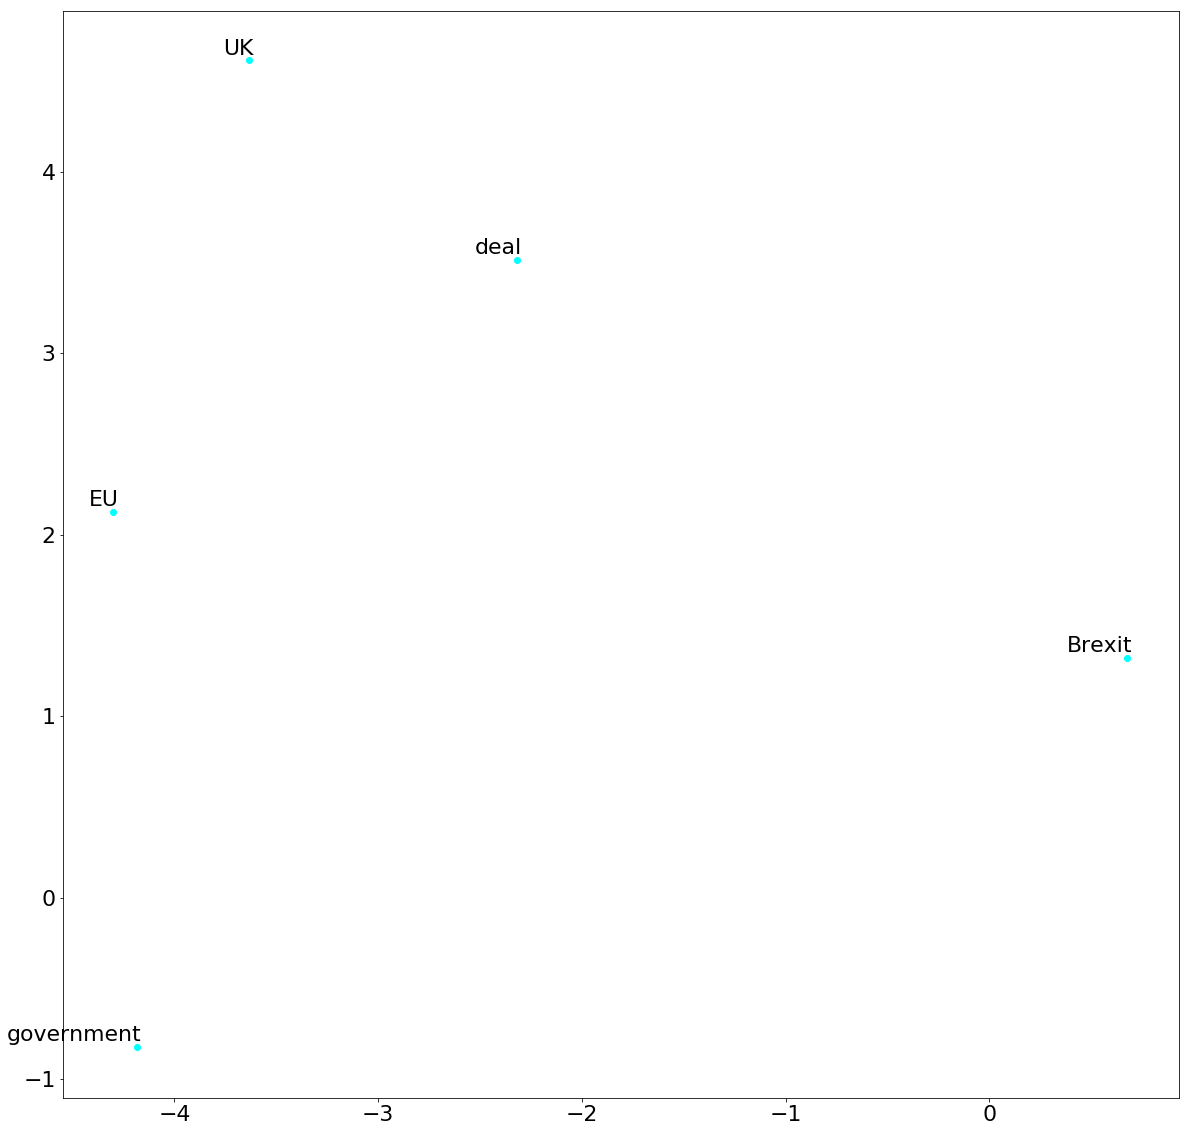

In [6]:
from packages.gc.plotter import Plotter
wordInfo = word2vecProcessor.getPoints(5)
print(len(wordInfo))
    
plotProcessor = Plotter(wordInfo)
plotProcessor.displayPlot()

[{'number_of_blocks': 28, 'total_count': 33, 'label': 'How', 'stemmed_word': 'how', 'score': 0, 'appeared': 1548979200, 'index': 521, 'topic': 1, 'x': 0.8973087, 'y': -3.8694434}, {'number_of_blocks': 21, 'total_count': 24, 'label': 'editor', 'stemmed_word': 'editor', 'score': 0, 'appeared': 1548892800, 'index': 412, 'topic': 1, 'x': -0.0813482, 'y': 0.20312813}, {'number_of_blocks': 19, 'total_count': 27, 'label': 'Laura', 'stemmed_word': 'laura', 'score': 0, 'appeared': 1547510400, 'index': 878, 'topic': 1, 'x': -2.1965766, 'y': 3.0247815}, {'number_of_blocks': 17, 'total_count': 20, 'label': 'JeanClaude', 'stemmed_word': 'jeanclaud', 'score': 0, 'appeared': 1548979200, 'index': 458, 'topic': 1, 'x': -1.6246071, 'y': 0.4342293}, {'number_of_blocks': 17, 'total_count': 20, 'label': 'Juncker', 'stemmed_word': 'juncker', 'score': 0, 'appeared': 1548979200, 'index': 459, 'topic': 1, 'x': 2.50022, 'y': 1.0322018}, {'number_of_blocks': 23, 'total_count': 29, 'label': 'bid', 'stemmed_word':

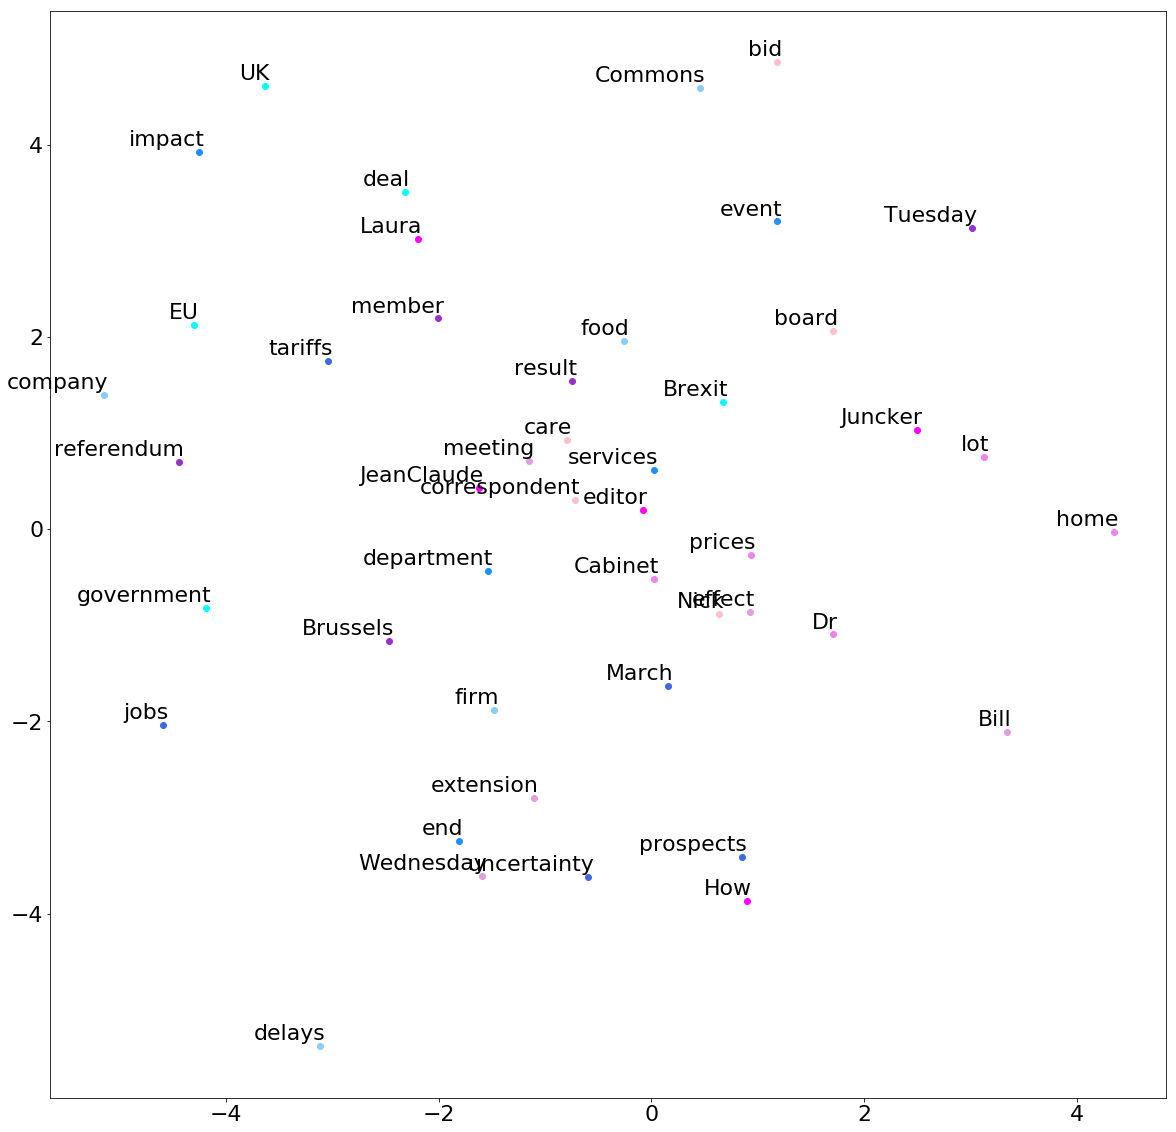

In [7]:
from packages.gc.plotter import Plotter

numberOfWords = 5

word2vecProcessor.setTopicFilter(1)
wordInfo = word2vecProcessor.getPoints(numberOfWords)

word2vecProcessor.setTopicFilter(2)
wordInfo += word2vecProcessor.getPoints(numberOfWords)

word2vecProcessor.setTopicFilter(3)
wordInfo += word2vecProcessor.getPoints(numberOfWords)

word2vecProcessor.setTopicFilter(4)
wordInfo += word2vecProcessor.getPoints(numberOfWords)

word2vecProcessor.setTopicFilter(5)
wordInfo += word2vecProcessor.getPoints(numberOfWords)

word2vecProcessor.setTopicFilter(6)
wordInfo += word2vecProcessor.getPoints(numberOfWords)

word2vecProcessor.setTopicFilter(7)
wordInfo += word2vecProcessor.getPoints(numberOfWords)

word2vecProcessor.setTopicFilter(8)
wordInfo += word2vecProcessor.getPoints(numberOfWords)

word2vecProcessor.setTopicFilter(9)
wordInfo += word2vecProcessor.getPoints(numberOfWords)

plotProcessor = Plotter(wordInfo)
print(wordInfo)
plotProcessor.displayPlot()
